In [25]:
import pandas as pd
# read csv file
df = pd.read_csv("divina.csv", encoding="utf-8")

In [26]:
df

,Name,number,phone number,gender,region,last visit,Previous purchase price,Second previous purchase price
0,Peng Yufang,146,921869947,female,Hsinchu,2023/3/6,382,267
1,Ding Yixin,145,936888540,female,Taoyuan,2023/3/7,297,210
2,Zhang Xiaoyun,108,912250417,female,Taoyuan,2023/3/5,735,350
3,Zhan Jiawen,140,937781860,Male,Taoyuan,2023/3/4,1680,840
4,Chen Meiyun,168,910651625,female,Taoyuan,2023/1/3,1172,717
5,Li Peirong,104,958600414,female,Hsinchu,2022/6/30,1310,1540
6,Liu Mingzhu,27,916115570,female,Taoyuan,2022/11/27,840,420
7,Luo Yuechun,93,34704103,female,Taoyuan,2023/3/17,595,367
8,Liang Cuiping,28,932270435,female,Taoyuan,2023/2/25,2310,1260
9,Cai Baixiu,95,955564195,Male,Taipei,2023/3/2,840,1795


In [27]:
#1.想知道客人從a-z字母排序
df_sorted = df.sort_values('Name')

# 將排序結果印出到控制台
df_sorted


,Name,number,phone number,gender,region,last visit,Previous purchase price,Second previous purchase price
9,Cai Baixiu,95,955564195,Male,Taipei,2023/3/2,840,1795
4,Chen Meiyun,168,910651625,female,Taoyuan,2023/1/3,1172,717
1,Ding Yixin,145,936888540,female,Taoyuan,2023/3/7,297,210
5,Li Peirong,104,958600414,female,Hsinchu,2022/6/30,1310,1540
8,Liang Cuiping,28,932270435,female,Taoyuan,2023/2/25,2310,1260
6,Liu Mingzhu,27,916115570,female,Taoyuan,2022/11/27,840,420
7,Luo Yuechun,93,34704103,female,Taoyuan,2023/3/17,595,367
0,Peng Yufang,146,921869947,female,Hsinchu,2023/3/6,382,267
3,Zhan Jiawen,140,937781860,Male,Taoyuan,2023/3/4,1680,840
2,Zhang Xiaoyun,108,912250417,female,Taoyuan,2023/3/5,735,350


In [28]:
# 2.計算女性比率
female_count = df[' gender'].value_counts()[' female']
total_count = df[' gender'].count()
female_ratio = female_count / total_count

# 將女性比率印出到控制台
print('女性比率為：', female_ratio)


女性比率為： 0.8


In [29]:
#3.想知道住在附近的比率
# 獲取地區為桃園的行數
taoyuan_rows = df[df[' region'] == ' Taoyuan'].shape[0]

# 獲取總行數
total_rows = df.shape[0]

# 計算地區為桃園的比率
taoyuan_ratio = taoyuan_rows / total_rows

# 輸出地區在桃園的比率
print('地區在桃園的比率為: {:.2f}%'.format(taoyuan_ratio*100))


地區在桃園的比率為: 70.00%


In [30]:
#4.常看到家人因為找不到會員資料苦惱，想要測試找尋的功能
# 查詢名字為Ding Yixin的資料
result = df[df['Name'] == 'Ding Yixin']

# 印出查詢結果
result

,Name,number,phone number,gender,region,last visit,Previous purchase price,Second previous purchase price
1,Ding Yixin,145,936888540,female,Taoyuan,2023/3/7,297,210


In [36]:
#5.想要找出可能會遠離的客人(兩個月沒來光顧)

from datetime import datetime, timedelta

# 計算現在的時間
now = datetime.now()

# 找出 last visit 距離現在超過兩個月的人
over_one_month = df[(now - pd.to_datetime(df[' last visit'])) > timedelta(days=60)]

# 印出結果
over_one_month

,Name,number,phone number,gender,region,last visit,Previous purchase price,Second previous purchase price
4,Chen Meiyun,168,910651625,female,Taoyuan,2023/1/3,1172,717
5,Li Peirong,104,958600414,female,Hsinchu,2022/6/30,1310,1540
6,Liu Mingzhu,27,916115570,female,Taoyuan,2022/11/27,840,420


In [41]:
#6.算出客人單次平均的消費
# 計算Previous purchase price與Second previous purchase price底下的值加總平均
total_price = df[' Previous purchase price'].sum() + df[' Second previous purchase price'].sum()
avg_price = total_price / (2 * len(df))

# 輸出結果
print(f"客人單次平均的消費: {avg_price}")

客人單次平均的消費: 896.35


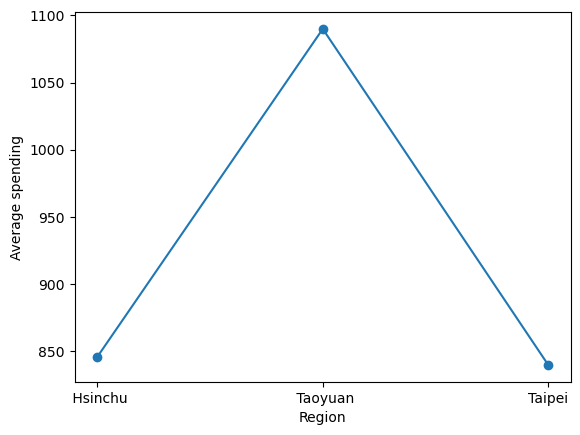

In [48]:
#7.不同地區的消費量折線圖表
import matplotlib.pyplot as plt

# 以地區分組，計算每個地區的平均消費
avg_spending_by_region = df.groupby(' region')[' Previous purchase price'].mean()

# 繪製折線圖
plt.plot(avg_spending_by_region.index, avg_spending_by_region.values, marker='o')

# 設定x軸標籤和y軸標籤
plt.xlabel('Region')
plt.ylabel('Average spending')

# 顯示圖表
plt.show()

In [51]:
#8.查看每位客人上次跟這次消費量的比較
# 添加新列，用于表示上次消费量更高的客人
df['Higher previous purchase'] = df.apply(lambda row: 'Previous' if row[' Previous purchase price'] > row[' Second previous purchase price'] else 'Second previous', axis=1)

# 输出结果
df[['Name', 'Higher previous purchase']]


,Name,Higher previous purchase
0,Peng Yufang,Previous
1,Ding Yixin,Previous
2,Zhang Xiaoyun,Previous
3,Zhan Jiawen,Previous
4,Chen Meiyun,Previous
5,Li Peirong,Second previous
6,Liu Mingzhu,Previous
7,Luo Yuechun,Previous
8,Liang Cuiping,Previous
9,Cai Baixiu,Second previous


In [56]:
# 9.找到上次消费量最高的客人
idx_max = df[' Previous purchase price'].idxmax()
customer_max = df.loc[idx_max]

# 输出客人信息
print("上次消费量最高的客人是：")
print(customer_max[['Name', ' number', ' Previous purchase price']])


上次消费量最高的客人是：
Name                        Liang Cuiping
 number                                28
 Previous purchase price             2310
Name: 8, dtype: object


In [62]:
#10.算出每位客人平均一日消費(上次消費/上次時間到今日)

# 將 'last visit' 欄位轉換為 datetime 格式
df[' last visit'] = pd.to_datetime(df[' last visit'])

# 計算從上次消費到今日的天數
df['days_since_last_visit'] = (datetime.now() - df[' last visit']).dt.days

# 計算平均一日消費
df['average_daily_spending'] = df[' Previous purchase price'] / df['days_since_last_visit']

# 顯示計算結果
df[['Name', ' region', ' Previous purchase price', 'days_since_last_visit', 'average_daily_spending']]


,Name,region,Previous purchase price,days_since_last_visit,average_daily_spending
0,Peng Yufang,Hsinchu,382,13,29.384615
1,Ding Yixin,Taoyuan,297,12,24.750000
2,Zhang Xiaoyun,Taoyuan,735,14,52.500000
3,Zhan Jiawen,Taoyuan,1680,15,112.000000
4,Chen Meiyun,Taoyuan,1172,75,15.626667
5,Li Peirong,Hsinchu,1310,262,5.000000
6,Liu Mingzhu,Taoyuan,840,112,7.500000
7,Luo Yuechun,Taoyuan,595,2,297.500000
8,Liang Cuiping,Taoyuan,2310,22,105.000000
9,Cai Baixiu,Taipei,840,17,49.411765
